In [114]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# 0. 运动员表
## 0.1 去除奖项

In [263]:
# 读取数据
athletes = pd.read_csv('2025_Problem_C_Data/summerOly_athletes.csv')

# 删除重复的行
athletes = athletes.drop_duplicates()

# 处理缺失值
athletes = athletes.dropna()

# 转换数据类型
athletes['Year'] = athletes['Year'].astype(int)
athletes['Medal'] = athletes['Medal'].astype(str)

# 删除文字中的空格
# 去除列中所有字符串数据前后的空格
athletes['NOC'] = athletes['NOC'].str.strip()  # 去除前后的空格
athletes['Sport'] = athletes['Sport'].str.strip()
athletes['Name'] = athletes['Name'].str.strip()

# 删除列中所有字符串数据中的空格（包括内部的空格）
athletes['NOC'] = athletes['NOC'].str.replace(' ', '', regex=False)
athletes['Sport'] = athletes['Sport'].str.replace(' ', '', regex=False)
athletes['Name'] = athletes['Name'].str.replace(' ', '', regex=False)

# 打印清洗后的数据
athletes


,Name,Sex,Team,NOC,Year,City,Sport,Event,Medal
0,ADijiang,M,China,CHN,1992,Barcelona,Basketball,Basketball Men's Basketball,No medal
1,ALamusi,M,China,CHN,2012,London,Judo,Judo Men's Extra-Lightweight,No medal
2,GunnarAaby,M,Denmark,DEN,1920,Antwerpen,Football,Football Men's Football,No medal
3,EdgarAabye,M,Denmark/Sweden,DEN,1900,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,Cornelia(-strannood),F,Netherlands,NED,1932,Los Angeles,Athletics,Athletics Women's 100 metres,No medal
...,...,...,...,...,...,...,...,...,...
252560,SeforaAda,F,Equatorial Guinea,GEQ,2024,Paris,Athletics,Women's 100m,No medal
252561,EmanuelaLiuzzi,F,Italy,ITA,2024,Paris,Wrestling,Women's Freestyle 50kg,No medal
252562,IsayahBoers,M,Netherlands,NED,2024,Paris,Athletics,4 x 400m Relay Mixed,Gold
252563,KevinStaut,M,France,FRA,2024,Paris,Equestrian,Jumping Team,Bronze


In [260]:
athletes_with_medal = athletes[athletes['Medal'] != 'No medal']
athletes_with_medal

,Name,Sex,Team,NOC,Year,City,Sport,Event,Medal
3,EdgarAabye,M,Denmark/Sweden,DEN,1900,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
12,ArvoAaltonen,M,Finland,FIN,1920,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
13,ArvoAaltonen,M,Finland,FIN,1920,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
15,PaavoAaltonen,M,Finland,FIN,1948,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
16,PaavoAaltonen,M,Finland,FIN,1948,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
...,...,...,...,...,...,...,...,...,...
252551,QuincyWilson,M,United States,USA,2024,Paris,Athletics,4 x 400m Relay Mixed,Silver
252556,vanAnne,F,Netherlands,NED,2024,Paris,Athletics,Women's 4 x 400m Relay,Silver
252562,IsayahBoers,M,Netherlands,NED,2024,Paris,Athletics,4 x 400m Relay Mixed,Gold
252563,KevinStaut,M,France,FRA,2024,Paris,Equestrian,Jumping Team,Bronze


In [261]:
athletes_with_gold_medal = athletes[athletes['Medal'] == 'Gold']
athletes_with_gold_medal

,Name,Sex,Team,NOC,Year,City,Sport,Event,Medal
3,EdgarAabye,M,Denmark/Sweden,DEN,1900,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
16,PaavoAaltonen,M,Finland,FIN,1948,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
18,PaavoAaltonen,M,Finland,FIN,1948,London,Gymnastics,Gymnastics Men's Horse Vault,Gold
22,PaavoAaltonen,M,Finland,FIN,1948,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold
33,RagnhildAamodt,F,Norway,NOR,2008,Beijing,Handball,Handball Women's Handball,Gold
...,...,...,...,...,...,...,...,...,...
252244,JanjaGarnbret,F,Slovenia,SLO,2024,Paris,SportClimbing,Women's Boulder & Lead,Gold
252475,CroixBethune,F,United States,USA,2024,Paris,Football,Women,Gold
252544,AaliyahButler,F,United States,USA,2024,Paris,Athletics,Women's 4 x 400m Relay,Gold
252550,QuincyWilson,M,United States,USA,2024,Paris,Athletics,Men's 4 x 400m Relay,Gold


## 0.2 离散点

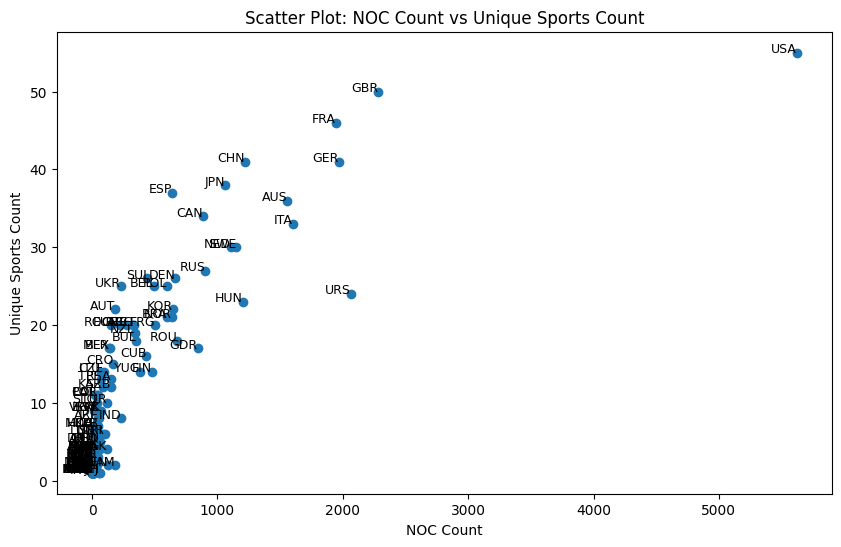

In [287]:
# 1. 计算每个 NOC 值的数量
noc_counts = athletes_with_medal['NOC'].value_counts()

# 2. 计算每个 NOC 对应的不同 Sport 数量
sport_counts = athletes_with_medal.groupby('NOC')['Sport'].nunique()

# 3. 计算每个 NOC 对应的不同 Sport 数量，确保它与 NOC 数量对应
noc_sport_counts = noc_counts.loc[sport_counts.index]

# 4. 绘制散点图
plt.figure(figsize=(10, 6))
plt.scatter(noc_sport_counts, sport_counts)

# 在每个点上添加 NOC 标签
for noc, count, sport in zip(sport_counts.index, noc_sport_counts, sport_counts):
    plt.text(count, sport, noc, fontsize=9, ha='right')

# 添加标签和标题
plt.xlabel('NOC Count')
plt.ylabel('Unique Sports Count')
plt.title('Scatter Plot: NOC Count vs Unique Sports Count')

# 显示图表
plt.show()


# 0.3 归一化和k-means

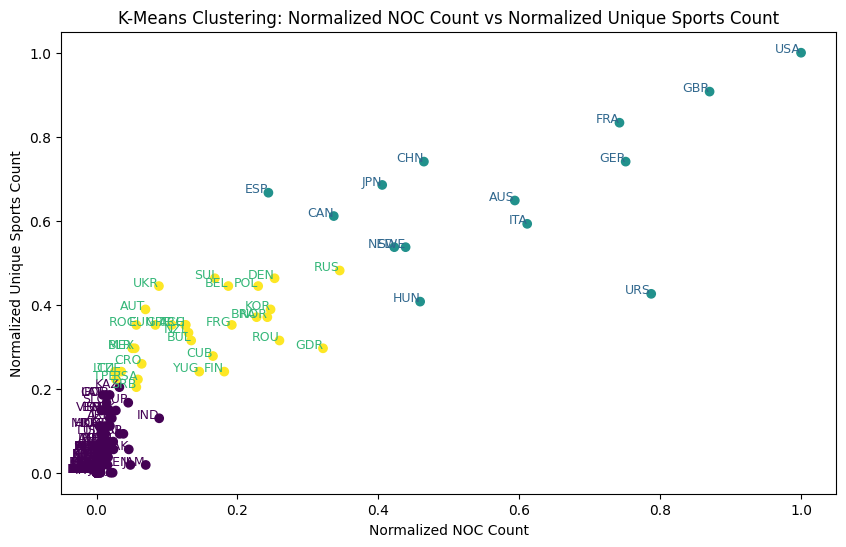

In [288]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 1. 计算每个 NOC 值的数量
noc_counts = athletes_with_medal['NOC'].value_counts()

# 将 'USA' 的数量减小 2000
noc_counts['USA'] = max(noc_counts['USA'] - 3000, 0)  # 防止数量变为负数

# 2. 计算每个 NOC 对应的不同 Sport 数量
sport_counts = athletes_with_medal.groupby('NOC')['Sport'].nunique()

# 3. 计算每个 NOC 对应的不同 Sport 数量，确保它与 NOC 数量对应
noc_sport_counts = noc_counts.loc[sport_counts.index]

# 使用 MinMaxScaler 对数据进行归一化
scaler = MinMaxScaler()

# 对 noc_sport_counts 和 sport_counts 进行归一化
noc_sport_counts_normalized = scaler.fit_transform(noc_sport_counts.values.reshape(-1, 1))
sport_counts_normalized = scaler.fit_transform(sport_counts.values.reshape(-1, 1))

# 将两个归一化的特征合并成一个数据集进行 KMeans 聚类
X = np.hstack([noc_sport_counts_normalized, sport_counts_normalized])

# 4. 使用 KMeans 聚类
kmeans = KMeans(n_clusters=3, random_state=42)  # 假设聚成 3 类
kmeans.fit(X)

# 获取聚类标签
labels = kmeans.labels_

# 5. 绘制散点图并使用不同颜色标记聚类结果
plt.figure(figsize=(10, 6))
plt.scatter(noc_sport_counts_normalized, sport_counts_normalized, c=labels, cmap='viridis')

# 在每个点上添加 NOC 标签
for noc, count, sport, label in zip(sport_counts.index, noc_sport_counts_normalized.flatten(), sport_counts_normalized.flatten(), labels):
    plt.text(count, sport, noc, fontsize=9, ha='right', color=plt.cm.viridis(label / 3))  # 根据标签设置颜色

# 添加标签和标题
plt.xlabel('Normalized NOC Count')
plt.ylabel('Normalized Unique Sports Count')
plt.title('K-Means Clustering: Normalized NOC Count vs Normalized Unique Sports Count')

# 显示图表
plt.show()


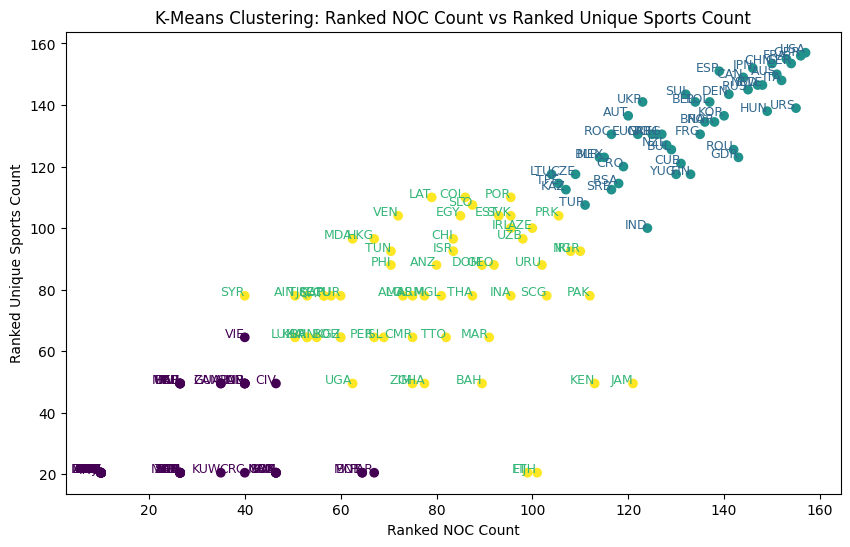

In [289]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# 1. 计算每个 NOC 值的数量
noc_counts = athletes_with_medal['NOC'].value_counts()

# 将 'USA' 的数量减小 3000
noc_counts['USA'] = max(noc_counts['USA'] - 3000, 0)  # 防止数量变为负数

# 2. 计算每个 NOC 对应的不同 Sport 数量
sport_counts = athletes_with_medal.groupby('NOC')['Sport'].nunique()

# 3. 计算每个 NOC 对应的不同 Sport 数量，确保它与 NOC 数量对应
noc_sport_counts = noc_counts.loc[sport_counts.index]

# 计算排名
noc_sport_counts_rank = noc_sport_counts.rank()
sport_counts_rank = sport_counts.rank()

# 将排名数据合并成一个数据集进行 KMeans 聚类
X = np.column_stack([noc_sport_counts_rank, sport_counts_rank])

# 4. 使用 KMeans 聚类
kmeans = KMeans(n_clusters=3, random_state=42)  # 假设聚成 3 类
kmeans.fit(X)

# 获取聚类标签
labels = kmeans.labels_

# 5. 绘制散点图并使用不同颜色标记聚类结果
plt.figure(figsize=(10, 6))
plt.scatter(noc_sport_counts_rank, sport_counts_rank, c=labels, cmap='viridis')

# 在每个点上添加 NOC 标签
for noc, rank_noc, rank_sport, label in zip(sport_counts.index, noc_sport_counts_rank, sport_counts_rank, labels):
    plt.text(rank_noc, rank_sport, noc, fontsize=9, ha='right', color=plt.cm.viridis(label / 3))  # 根据标签设置颜色

# 添加标签和标题
plt.xlabel('Ranked NOC Count')
plt.ylabel('Ranked Unique Sports Count')
plt.title('K-Means Clustering: Ranked NOC Count vs Ranked Unique Sports Count')

# 显示图表
plt.show()


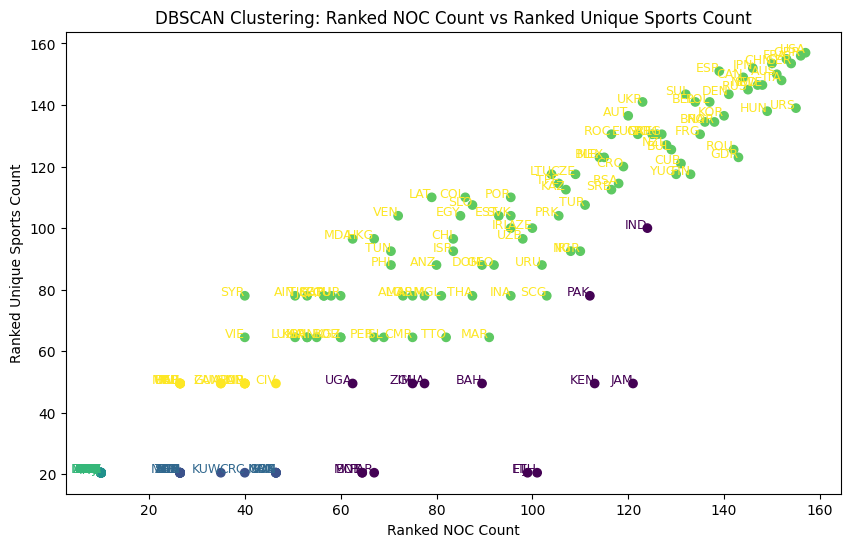

In [309]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np

# 1. 计算每个 NOC 值的数量
noc_counts = athletes_with_medal['NOC'].value_counts()

# 将 'USA' 的数量减小 3000
noc_counts['USA'] = max(noc_counts['USA'], 0)  # 防止数量变为负数

# 2. 计算每个 NOC 对应的不同 Sport 数量
sport_counts = athletes_with_medal.groupby('NOC')['Sport'].nunique()

# 3. 计算每个 NOC 对应的不同 Sport 数量，确保它与 NOC 数量对应
noc_sport_counts = noc_counts.loc[sport_counts.index]

# 计算排名
noc_sport_counts_rank = noc_sport_counts.rank()
sport_counts_rank = sport_counts.rank()

# 将排名数据合并成一个数据集进行 DBSCAN 聚类
X = np.column_stack([noc_sport_counts_rank, sport_counts_rank])

# 4. 使用 DBSCAN 聚类
dbscan = DBSCAN(eps=14, min_samples=5)  # eps 是邻域的最大距离，min_samples 是每个簇的最小样本数
labels = dbscan.fit_predict(X)

# 5. 绘制散点图并使用不同颜色标记聚类结果
plt.figure(figsize=(10, 6))
plt.scatter(noc_sport_counts_rank, sport_counts_rank, c=labels, cmap='viridis')

# 在每个点上添加 NOC 标签
for noc, rank_noc, rank_sport, label in zip(sport_counts.index, noc_sport_counts_rank, sport_counts_rank, labels):
    plt.text(rank_noc, rank_sport, noc, fontsize=9, ha='right', color=plt.cm.viridis((label + 1) / 3))  # 根据标签设置颜色

# 添加标签和标题
plt.xlabel('Ranked NOC Count')
plt.ylabel('Ranked Unique Sports Count')
plt.title('DBSCAN Clustering: Ranked NOC Count vs Ranked Unique Sports Count')

# 显示图表
plt.show()


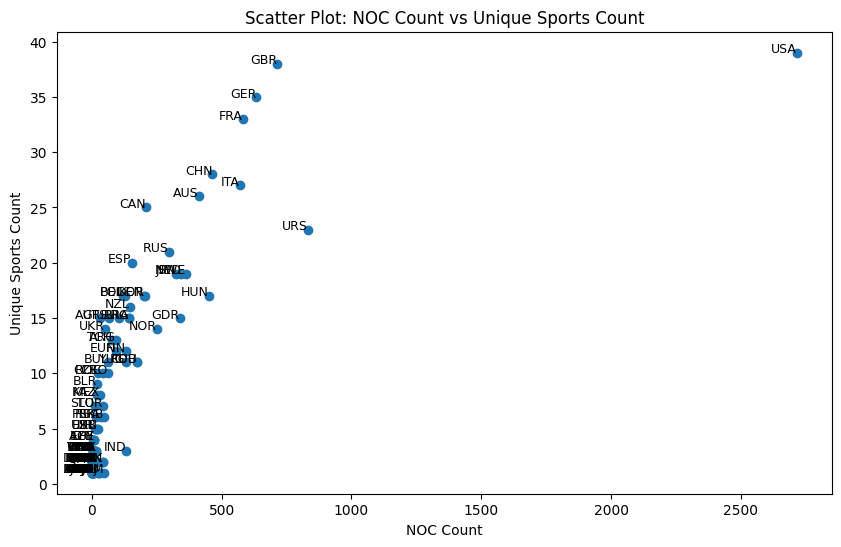

In [271]:
# 1. 计算每个 NOC 值的数量
noc_counts = athletes_with_gold_medal['NOC'].value_counts()

# 2. 计算每个 NOC 对应的不同 Sport 数量
sport_counts = athletes_with_gold_medal.groupby('NOC')['Sport'].nunique()

# 3. 计算每个 NOC 对应的不同 Sport 数量，确保它与 NOC 数量对应
noc_sport_counts = noc_counts.loc[sport_counts.index]

# 4. 绘制散点图
plt.figure(figsize=(10, 6))
plt.scatter(noc_sport_counts, sport_counts)

# 在每个点上添加 NOC 标签
for noc, count, sport in zip(sport_counts.index, noc_sport_counts, sport_counts):
    plt.text(count, sport, noc, fontsize=9, ha='right')

# 添加标签和标题
plt.xlabel('NOC Count')
plt.ylabel('Unique Sports Count')
plt.title('Scatter Plot: NOC Count vs Unique Sports Count')

# 显示图表
plt.show()


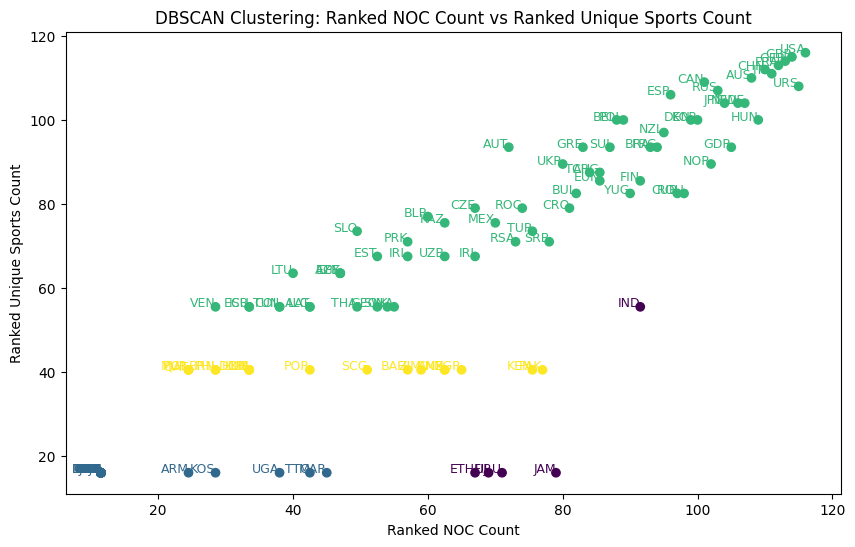

In [310]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np

# 1. 计算每个 NOC 值的数量
noc_counts = athletes_with_gold_medal['NOC'].value_counts()

# 将 'USA' 的数量减小 3000
noc_counts['USA'] = max(noc_counts['USA'], 0)  # 防止数量变为负数

# 2. 计算每个 NOC 对应的不同 Sport 数量
sport_counts = athletes_with_gold_medal.groupby('NOC')['Sport'].nunique()

# 3. 计算每个 NOC 对应的不同 Sport 数量，确保它与 NOC 数量对应
noc_sport_counts = noc_counts.loc[sport_counts.index]

# 计算排名
noc_sport_counts_rank = noc_sport_counts.rank()
sport_counts_rank = sport_counts.rank()

# 将排名数据合并成一个数据集进行 DBSCAN 聚类
X = np.column_stack([noc_sport_counts_rank, sport_counts_rank])

# 4. 使用 DBSCAN 聚类
dbscan = DBSCAN(eps=14, min_samples=5)  # eps 是邻域的最大距离，min_samples 是每个簇的最小样本数
labels = dbscan.fit_predict(X)

# 5. 绘制散点图并使用不同颜色标记聚类结果
plt.figure(figsize=(10, 6))
plt.scatter(noc_sport_counts_rank, sport_counts_rank, c=labels, cmap='viridis')

# 在每个点上添加 NOC 标签
for noc, rank_noc, rank_sport, label in zip(sport_counts.index, noc_sport_counts_rank, sport_counts_rank, labels):
    plt.text(rank_noc, rank_sport, noc, fontsize=9, ha='right', color=plt.cm.viridis((label + 1) / 3))  # 根据标签设置颜色

# 添加标签和标题
plt.xlabel('Ranked NOC Count')
plt.ylabel('Ranked Unique Sports Count')
plt.title('DBSCAN Clustering: Ranked NOC Count vs Ranked Unique Sports Count')

# 显示图表
plt.show()


# 1.数据预处理分析
# 1.1 东道主分析

In [231]:
hosts = pd.read_csv('2025_Problem_C_Data/summerOly_hosts.csv')
hosts

,Year,Host,NOC
0,1896,"Athens, Greece",GRE
1,1900,"Paris, France",FRA
2,1904,"St. Louis, United States",USA
3,1908,"London, United Kingdom",GRB
4,1912,"Stockholm, Sweden",SWE
5,1916,Cancelled (WWI – Berlin had been awarded),NaN
6,1920,"Antwerp, Belgium",BEL
7,1924,"Paris, France",FRA
8,1928,"Amsterdam, Netherlands",NED
9,1932,"Los Angeles, United States",USA


    Year                                         Host  NOC
5   1916    Cancelled (WWI – Berlin had been awarded)  NaN
10  1936                              Berlin, Germany  NaN
11  1940    Cancelled (WWII – Tokyo had been awarded)  NaN
12  1944   Cancelled (WWII – London had been awarded)  NaN
33  2028                   Los Angeles, United States  NaN
34  2032                          Brisbane, Australia  NaN


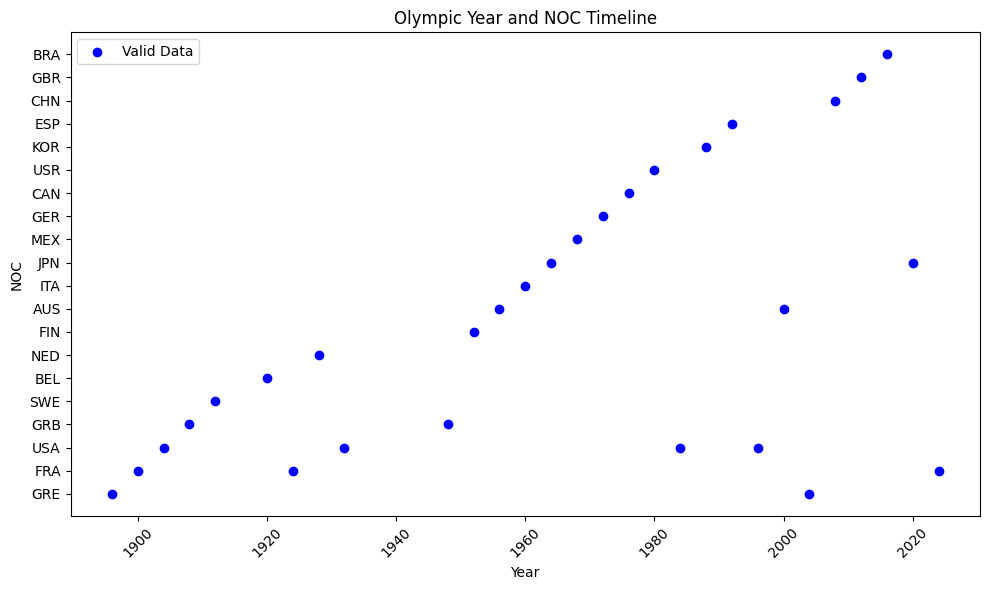

In [245]:
# 创建一个图形
plt.figure(figsize=(10, 6))

# 绘制正常的数据点
valid_data = hosts.dropna()  # 去掉NaN值的数据
plt.scatter(valid_data['Year'], valid_data['NOC'], color='b', marker='o', label='Valid Data')

# 找到 'Year' 或 'NOC' 列有NaN的行
invalid_data = hosts[hosts['Year'].isna() | hosts['NOC'].isna()]  # 确保检查 'Year' 或 'NOC' 中的NaN

# 输出NaN数据
print(invalid_data)

# 设置图标题和标签
plt.title('Olympic Year and NOC Timeline')
plt.xlabel('Year')
plt.ylabel('NOC')
plt.xticks(rotation=45)
plt.tight_layout()

# 添加图例
plt.legend()

# 显示图形
plt.show()

# 1.2 奖牌映射

In [207]:
medal_counts = pd.read_csv('2025_Problem_C_Data/summerOly_medal_counts.csv')
medal_counts

,Rank,Country,NOC,Gold,Silver,Bronze,Total,Year
0,1,United States,NaN,11,7,2,20,1896
1,2,Greece,NaN,10,18,19,47,1896
2,3,Germany,NaN,6,5,2,13,1896
3,4,France,NaN,5,4,2,11,1896
4,5,Great Britain,NaN,2,3,2,7,1896
...,...,...,...,...,...,...,...,...
1430,84,Qatar,NaN,0,0,1,1,2024
1431,84,Refugee Olympic Team,NaN,0,0,1,1,2024
1432,84,Singapore,NaN,0,0,1,1,2024
1433,84,Slovakia,NaN,0,0,1,1,2024


In [209]:
# 统计每个国家的出现次数
country_counts = medal_counts['Country'].value_counts()
country_counts

Country
Great Britain           28
France                  28
Denmark                 27
United States           27
Canada                  26
                        ..
Saint Lucia              1
Dominica                 1
Albania                  1
Cabo Verde               1
Refugee Olympic Team     1
Name: count, Length: 210, dtype: int64

In [212]:
country_to_noc = {
    'Great Britain': 'GBR',
    'France': 'FRA',
    'Denmark': 'DEN',
    'United States': 'USA',
    'Canada': 'CAN',
    'Hungary': 'HUN',
    'Switzerland': 'SUI',
    'Australia': 'AUS',
    'Italy': 'ITA',
    'Belgium': 'BEL',
    'Sweden': 'SWE',
    'Norway': 'NOR',
    'Netherlands': 'NED',
    'Austria': 'AUT',
    'Finland': 'FIN',
    'Japan': 'JPN',
    'Poland': 'POL',
    'New Zealand': 'NZL',
    'Mexico': 'MEX',
    'Greece': 'GRC',
    'Romania': 'ROU',
    'Brazil': 'BRA',
    'Spain': 'ESP',
    'Argentina': 'ARG',
    'South Africa': 'RSA',
    'India': 'IND',
    'Turkey': 'TUR',
    'South Korea': 'KOR',
    'Cuba': 'CUB',
    'Germany': 'GER',
    'Jamaica': 'JAM',
    'Iran': 'IRI',
    'Bulgaria': 'BUL',
    'Portugal': 'PRT',
    'Czechoslovakia': 'TCH',
    'Ireland': 'IRL',
    'Kenya': 'KEN',
    'Yugoslavia': 'YUG',
    'Mongolia': 'MNG',
    'Ethiopia': 'ETH',
    'Thailand': 'THA',
    'Egypt': 'EGY',
    'China': 'CHN',
    'North Korea': 'PRK',
    'Colombia': 'COL',
    'Estonia': 'EST',
    'Morocco': 'MAR',
    'Trinidad and Tobago': 'TTO',
    'Chinese Taipei': 'TPE',
    'Nigeria': 'NGA',
    'Venezuela': 'VEN',
    'Bahamas': 'BAH',
    'Indonesia': 'INA',
    'Pakistan': 'PAK',
    'Tunisia': 'TUN',
    'Philippines': 'PHI',
    'Puerto Rico': 'PUR',
    'Lithuania': 'LTU',
    'Croatia': 'HRV',
    'Slovenia': 'SVN',
    'Slovakia': 'SVK',
    'Ukraine': 'UKR',
    'Algeria': 'ALG',
    'Kazakhstan': 'KAZ',
    'Israel': 'ISR',
    'Uzbekistan': 'UZB',
    'Chile': 'CHL',
    'Soviet Union': 'URS',
    'Czech Republic': 'CZE',
    'Latvia': 'LAT',
    'Azerbaijan': 'AZE',
    'Georgia': 'GEO',
    'Belarus': 'BLR',
    'Malaysia': 'MAS',
    'Uganda': 'UGA',
    'Dominican Republic': 'DOM',
    'Uruguay': 'URU',
    'Armenia': 'ARM',
    'Qatar': 'QAT',
    'Russia': 'RUS',
    'Cameroon': 'CMR',
    'Peru': 'PER',
    'Serbia': 'SRB',
    'East Germany': 'GDR',
    'West Germany': 'FRG',
    'Moldova': 'MDA',
    'Hong Kong': 'HKG',
    'Syria': 'SYR',
    'Ivory Coast': 'CIV',
    'Iceland': 'ISL',
    'Ghana': 'GHA',
    'Tajikistan': 'TJK',
    'Vietnam': 'VNM',
    'Bahrain': 'BRN',
    'Ecuador': 'ECU',
    'Kyrgyzstan': 'KGZ',
    'Singapore': 'SGP',
    'Grenada': 'GRD',
    'Kosovo': 'KSV',
    'Panama': 'PAN',
    'Mixed team': 'MIX',
    'Luxembourg': 'LUX',
    'Jordan': 'JOR',
    'Botswana': 'BWA',
    'Fiji': 'FJI',
    'Kuwait': 'KUW',
    'Zambia': 'ZAM',
    'Namibia': 'NAM',
    'Saudi Arabia': 'KSA',
    'Lebanon': 'LBN',
    'Zimbabwe': 'ZIM',
    'Costa Rica': 'CRC',
    'FR Yugoslavia': 'YUG',
    'Russian Empire': 'RUS',
    'Guatemala': 'GTM',
    'Afghanistan': 'AFG',
    'Cyprus': 'CYP',
    'Burundi': 'BDI',
    'Mozambique': 'MOZ',
    'Bohemia': 'BOH',
    'Australasia': 'AUS',
    'Haiti': 'HTI',
    'United Team of Germany': 'GDR',
    'Bermuda': 'BER',
    'Niger': 'NER',
    'United Arab Emirates': 'ARE',
    'Suriname': 'SUR',
    'Guyana': 'GUY',
    'Ceylon': 'CEY',
    'Formosa': 'TPE',
    'Iraq': 'IRQ',
    'British West Indies': 'BWI',
    'Unified Team': 'EUN',
    'Djibouti': 'DJI',
    'Virgin Islands': 'VIR',
    'Senegal': 'SEN',
    'Netherlands Antilles': 'ANT',
    'Taiwan': 'TPE',
    'Tanzania': 'TAN',
    'Independent Olympic Participants': 'IOP',
    'Macedonia': 'MKD',
    'Barbados': 'BRB',
    'Sri Lanka': 'LKA',
    'Tonga': 'TON',
    'Sudan': 'SDN',
    'Samoa': 'SAM',
    'Paraguay': 'PRY',
    'Eritrea': 'ERI',
    'Gabon': 'GAB',
    'Togo': 'TOG',
    'Mauritius': 'MRI',
    'Serbia and Montenegro': 'SCG',
    'Independent Olympic Athletes': 'IOA',
    'Montenegro': 'MNE',
    'ROC': 'ROC',
    'San Marino': 'SMR',
    'North Macedonia': 'MKD',
    'Turkmenistan': 'TKM',
    'Burkina Faso': 'BFA',
    'Saint Lucia': 'LCA',
    'Dominica': 'DMA',
    'Albania': 'ALB',
    'Cabo Verde': 'CPV',
    'Refugee Olympic Team': 'ROT'
}


In [214]:
# 使用 .map() 方法将 'Country' 列的值转换为 'NOC'
medal_counts['NOC'] = medal_counts['Country'].map(country_to_noc)
medal_counts

,Rank,Country,NOC,Gold,Silver,Bronze,Total,Year
0,1,United States,USA,11,7,2,20,1896
1,2,Greece,GRC,10,18,19,47,1896
2,3,Germany,GER,6,5,2,13,1896
3,4,France,FRA,5,4,2,11,1896
4,5,Great Britain,GBR,2,3,2,7,1896
...,...,...,...,...,...,...,...,...
1430,84,Qatar,QAT,0,0,1,1,2024
1431,84,Refugee Olympic Team,ROT,0,0,1,1,2024
1432,84,Singapore,SGP,0,0,1,1,2024
1433,84,Slovakia,SVK,0,0,1,1,2024


# 1.3 项目表

In [10]:
programs = pd.read_csv('2025_Problem_C_Data/summerOly_programs.csv')
programs

,Sport,Discipline,Code,Sports Governing Body,1896,1900,1904,1906*,1908,1912,...,1988,1992,1996,2000,2004,2008,2012,2016,2020,2024
0,Aquatics,Artistic Swimming,SWA,World Aquatics,0,0,0,0,0,0,...,2,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
1,Aquatics,Diving,DIV,World Aquatics,0,0,2,1,2,4,...,4,4.0,4.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0
2,Aquatics,Marathon Swimming,OWS,World Aquatics,0,0,0,0,0,0,...,0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0
3,Aquatics,Swimming,SWM,World Aquatics,4,7,9,4,6,9,...,31,31.0,32.0,32.0,32.0,32.0,32.0,32.0,35.0,35.0
4,Aquatics,Water Polo,WPO,World Aquatics,0,1,1,0,1,1,...,1,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,Skating,Figure,FSK,ISU,0,0,0,0,4,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,Ice Hockey,Ice Hockey,IHO,IIHF,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,Total events,Total events,Total events,Total events,43,97,95,76,110,102,...,237,257.0,271.0,300.0,301.0,302.0,302.0,306.0,339.0,329.0
72,Total disciplines,Total disciplines,Total disciplines,Total disciplines,10,22,18,13,25,18,...,31,34.0,37.0,40.0,40.0,42.0,40.0,42.0,50.0,48.0


# 2.项目总数统计和预测

## 2.1纯统计

<Figure size 1000x600 with 0 Axes>

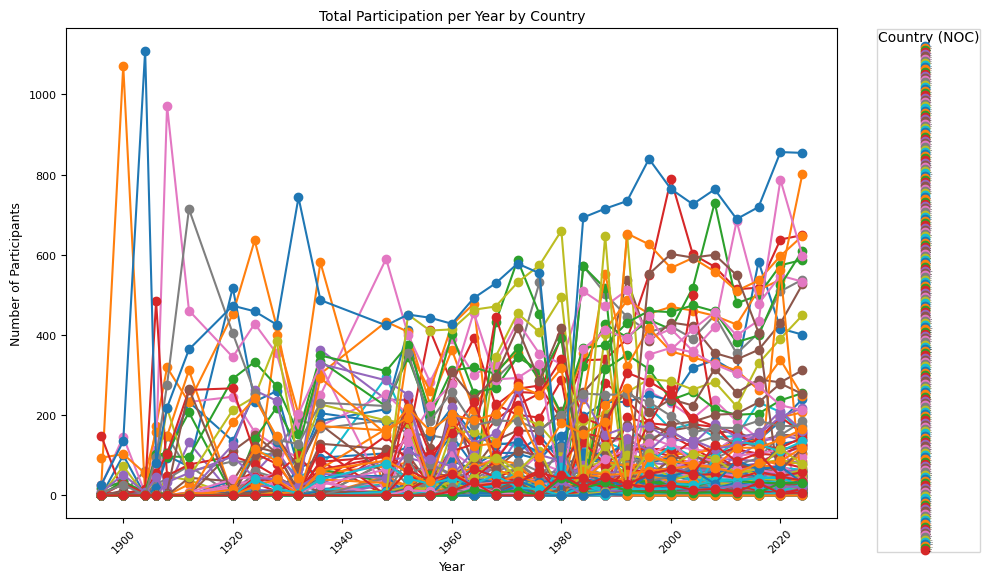

In [56]:
import matplotlib.pyplot as plt

# 按年份和国家（NOC）统计参赛人数
participation_by_year_country = athletes.groupby(['Year', 'NOC']).size().unstack(fill_value=0)

# 绘制折线图
plt.figure(figsize=(10, 6))
participation_by_year_country.plot(kind='line', marker='o', figsize=(10, 6))

# 设置标题、标签和图例的字体大小
plt.title('Total Participation per Year by Country', fontsize=10)  # 设置标题字体大小
plt.xlabel('Year', fontsize=9)  # 设置 x 轴标签字体大小
plt.ylabel('Number of Participants', fontsize=9)  # 设置 y 轴标签字体大小
plt.xticks(rotation=45, fontsize=8)  # 设置 x 轴刻度字体大小
plt.yticks(fontsize=8)  # 设置 y 轴刻度字体大小

# 设置图例的字体大小
plt.legend(title='Country (NOC)', fontsize=1.3, title_fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


# 2.2 数据清洗
- 去除Year中后三项全为0的列
- 删除东道主点
- 删除离群点，阈值为100
- 线性插值填充NAN

In [98]:
# 按年份和国家（NOC）统计参赛人数
participation_by_year_country = athletes.groupby(['Year', 'NOC']).size().unstack(fill_value=0)

# 删除最后三行全为0的列
participation_by_year_country_q1_clean = participation_by_year_country.loc[:, participation_by_year_country.iloc[-3:].sum(axis=0) != 0]

# 遍历 hosts 表的每一行，获取 Year 和 NOC
for _, row in hosts.iterrows():
    year = row['Year']
    noc = row['NOC']
    
    # 如果该 Year 和 NOC 在 participation_by_year_country_q1_clean 中，设置为 NaN
    if year in participation_by_year_country_q1_clean.index and noc in participation_by_year_country_q1_clean.columns:
        participation_by_year_country_q1_clean.at[year, noc] = None  # 设置为 NaN

# 设置一个阈值，假设阈值为某个差异的倍数，可以根据数据调整
threshold = 100

# 对每个国家的参赛人数进行遍历，计算相邻年份之间的差异
for country in participation_by_year_country_q1_clean.columns:
    for year in range(1, len(participation_by_year_country_q1_clean)):
        # 计算当前年份和上一年份之间的差异
        previous_value = participation_by_year_country_q1_clean.loc[participation_by_year_country_q1_clean.index[year - 1], country]
        current_value = participation_by_year_country_q1_clean.loc[participation_by_year_country_q1_clean.index[year], country]
        
        difference = abs(current_value - previous_value)
        
        # 如果差异大于阈值，认为是坏点
        if difference > threshold:
            participation_by_year_country_q1_clean.loc[participation_by_year_country_q1_clean.index[year], country] = None  # 设置为 NaN

# 对坏点（NaN）进行线性插值填充
participation_by_year_country_q1_clean = participation_by_year_country_q1_clean.interpolate(method='linear', axis=0)



<Figure size 1000x600 with 0 Axes>

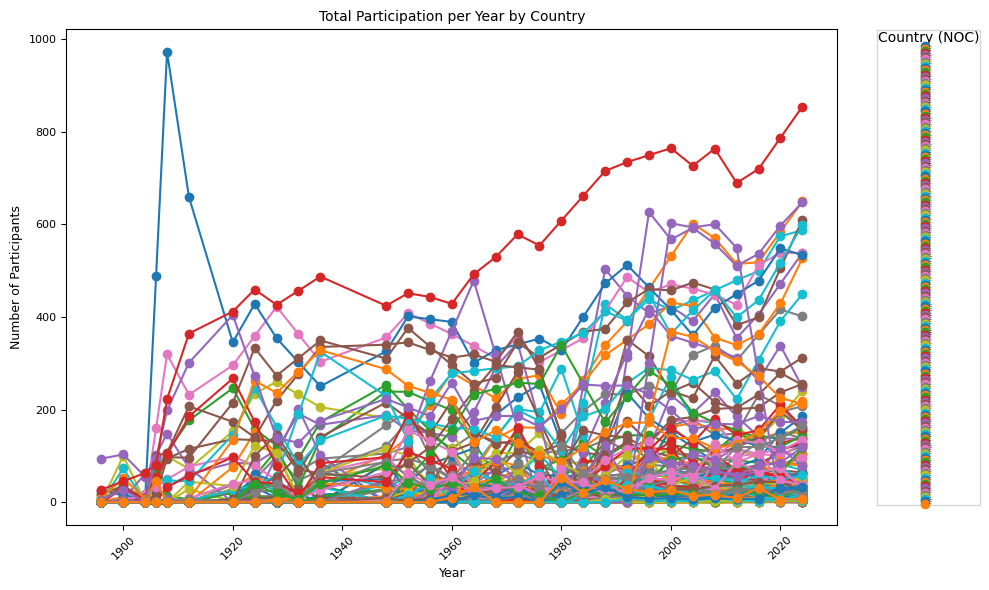

In [99]:
# 绘制折线图
plt.figure(figsize=(10, 6))
participation_by_year_country_q1_clean.plot(kind='line', marker='o', figsize=(10, 6))

# 设置标题、标签和图例的字体大小
plt.title('Total Participation per Year by Country', fontsize=10)  # 设置标题字体大小
plt.xlabel('Year', fontsize=9)  # 设置 x 轴标签字体大小
plt.ylabel('Number of Participants', fontsize=9)  # 设置 y 轴标签字体大小
plt.xticks(rotation=45, fontsize=8)  # 设置 x 轴刻度字体大小
plt.yticks(fontsize=8)  # 设置 y 轴刻度字体大小

# 设置图例的字体大小
plt.legend(title='Country (NOC)', fontsize=1.3, title_fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

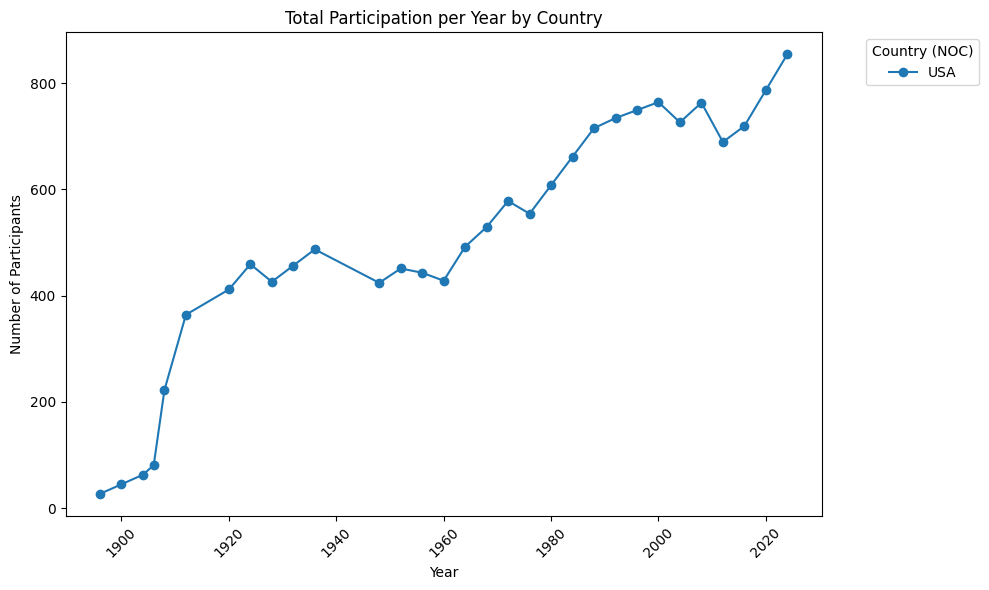

In [110]:
plt.figure(figsize=(10, 6))
participation_by_year_country_q1_clean['USA'].plot(kind='line', marker='o', figsize=(10, 6))

plt.title('Total Participation per Year by Country')
plt.xlabel('Year')
plt.ylabel('Number of Participants')
plt.xticks(rotation=45)
plt.legend(title='Country (NOC)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 2.3 非线性回归
- 采用非线性回归
- 更关注末尾年份数据的信息

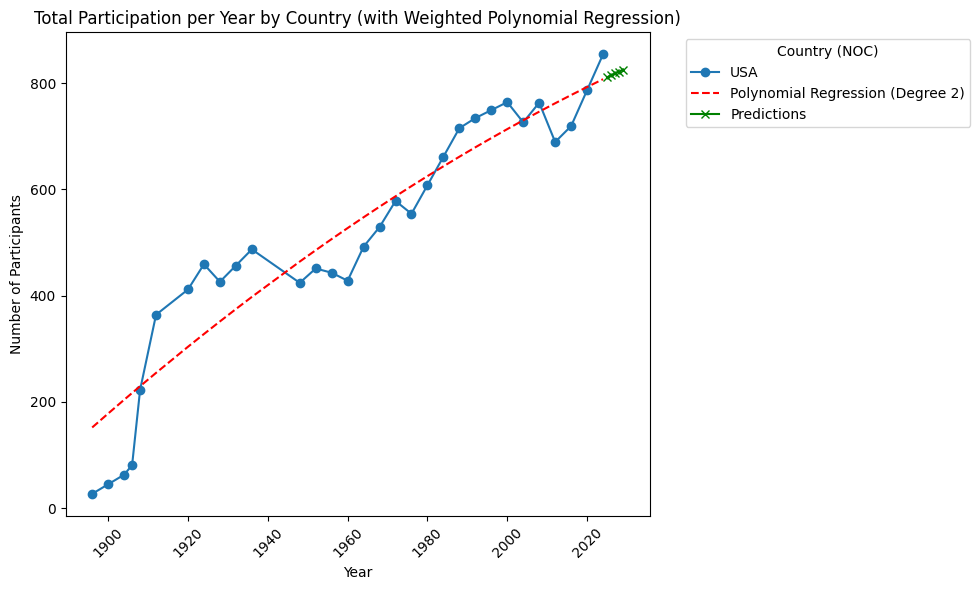

In [122]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Assuming 'years' and 'participants' are already extracted
years = participation_by_year_country_q1_clean.index.values.reshape(-1, 1)
participants = participation_by_year_country_q1_clean['USA'].values

# Define weights that emphasize the recent years (e.g., assign higher weight to the last years)
weights = np.linspace(1, 10, len(years))  # Linear weight increasing with time, or adjust as needed

# Initialize PolynomialFeatures for a degree-2 polynomial (you can adjust the degree)
degree = 2  # You can try higher values like 3, 4, etc.
poly = PolynomialFeatures(degree=degree)

# Transform the 'years' into polynomial features
years_poly = poly.fit_transform(years)

# Fit the polynomial regression model with weights
model = LinearRegression()
model.fit(years_poly, participants, sample_weight=weights)

# Predict for the original years and future years
predicted_participants = model.predict(years_poly)

# For future years (e.g., the next 5 years)
last_year = years[-1][0]
future_years = np.array(range(last_year + 1, last_year + 6)).reshape(-1, 1)
future_years_poly = poly.transform(future_years)
future_predicted_participants = model.predict(future_years_poly)

# Plotting the data
plt.figure(figsize=(10, 6))

# Plot the original data
participation_by_year_country_q1_clean['USA'].plot(kind='line', marker='o', figsize=(10, 6))

# Plot the polynomial regression curve
plt.plot(years, predicted_participants, color='red', linestyle='--', label=f'Polynomial Regression (Degree {degree})')

# Plot the future predictions
plt.plot(future_years, future_predicted_participants, color='green', marker='x', linestyle='-', label='Predictions')

# Titles and labels
plt.title('Total Participation per Year by Country (with Weighted Polynomial Regression)')
plt.xlabel('Year')
plt.ylabel('Number of Participants')
plt.xticks(rotation=45)
plt.legend(title='Country (NOC)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## 2.4 隐马尔可夫模型

Predicted participation for next year: 758.9


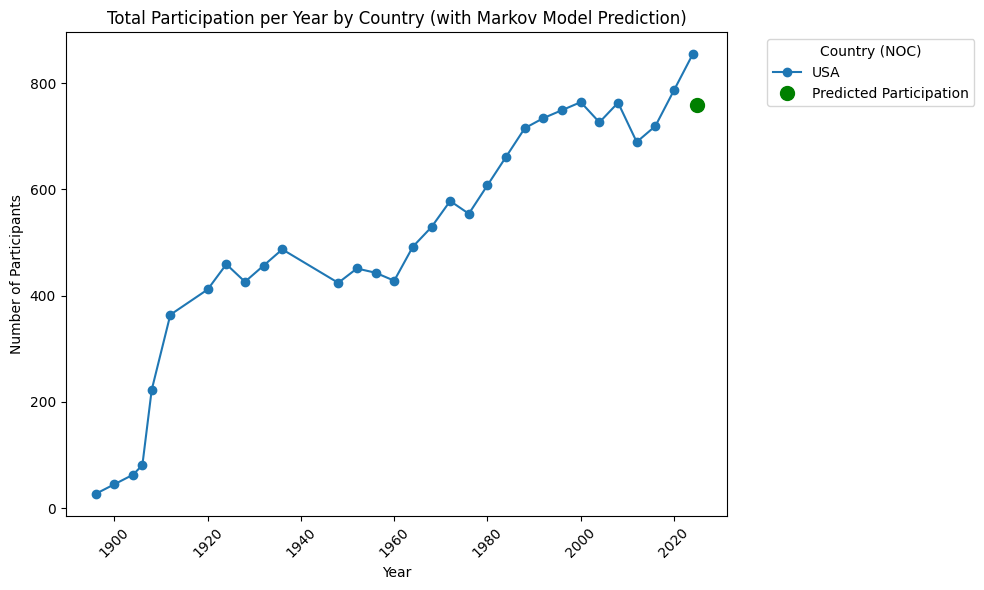

In [163]:
# 假设 'participation_by_year_country_q1_clean' 是一个 DataFrame，包含每个国家的参与人数数据
country_table = participation_by_year_country_q1_clean['USA']

years = participation_by_year_country_q1_clean.index.values
participants = country_table.values

# 步骤一：定义状态空间，使用最近数据进行状态划分
min_participation = min(participants)
max_participation = max(participants)
num_states = 5  # 将参与人数划分为5个状态

# 使用最近的数据来计算状态划分
recent_years_participants = participants[-5:]  # 只考虑最近5年的数据
state_bins = np.percentile(recent_years_participants, np.linspace(0, 100, num_states + 1))  # 根据百分位数划分
states = np.digitize(participants, state_bins) - 1  # 将参与人数映射为状态索引

# 修正：确保状态值在0到num_states-1之间
states = np.clip(states, 0, num_states - 1)

# 步骤二：引入时间加权，给较近年份更高权重
decay_factor = 0.9
weights = np.array([decay_factor ** (len(years) - i) for i in range(len(years))])

# 计算加权状态转移矩阵
transition_matrix = np.zeros((num_states, num_states))

for i in range(len(states) - 1):
    current_state = states[i]
    next_state = states[i + 1]
    
    # 加权转移次数
    weight = weights[i]
    transition_matrix[current_state, next_state] += weight

# 将转移次数转化为概率
row_sums = transition_matrix.sum(axis=1, keepdims=True)
# 处理没有转移的行，避免出现 NaN
row_sums[row_sums == 0] = 1  # 将零行的总和设置为1，以避免除零错误

# 对转移矩阵进行平滑处理，防止出现零概率
smooth_constant = 1e-4  # 改进平滑常数
transition_matrix += smooth_constant
transition_matrix = transition_matrix / transition_matrix.sum(axis=1, keepdims=True)  # 重新归一化

# 步骤三：预测未来状态
current_state = states[-1]  # 假设当前状态是最后一年的状态

# 预测下一个状态
future_state_probs = transition_matrix[current_state]

# 如果概率包含 NaN 或零概率，进行处理
future_state_probs = np.nan_to_num(future_state_probs, nan=1.0)  # 将 NaN 替换为 1，确保概率有效

# 确保概率和为1
future_state_probs /= np.sum(future_state_probs)

# 使用概率选择下一个状态
predicted_future_state = np.random.choice(range(num_states), p=future_state_probs)

# 将预测的状态映射回参与人数区间
predicted_participation = (state_bins[predicted_future_state] + state_bins[predicted_future_state + 1]) / 2

# 打印预测的参与人数
print(f"Predicted participation for next year: {predicted_participation}")

# 可视化数据
plt.figure(figsize=(10, 6))

# 绘制原始数据
country_table.plot(kind='line', marker='o', figsize=(10, 6))

# 显示预测的参与人数
plt.plot(years[-1] + 1, predicted_participation, 'go', label='Predicted Participation', markersize=10)

# 添加标题和标签
plt.title('Total Participation per Year by Country (with Markov Model Prediction)')
plt.xlabel('Year')
plt.ylabel('Number of Participants')
plt.xticks(rotation=45)
plt.legend(title='Country (NOC)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


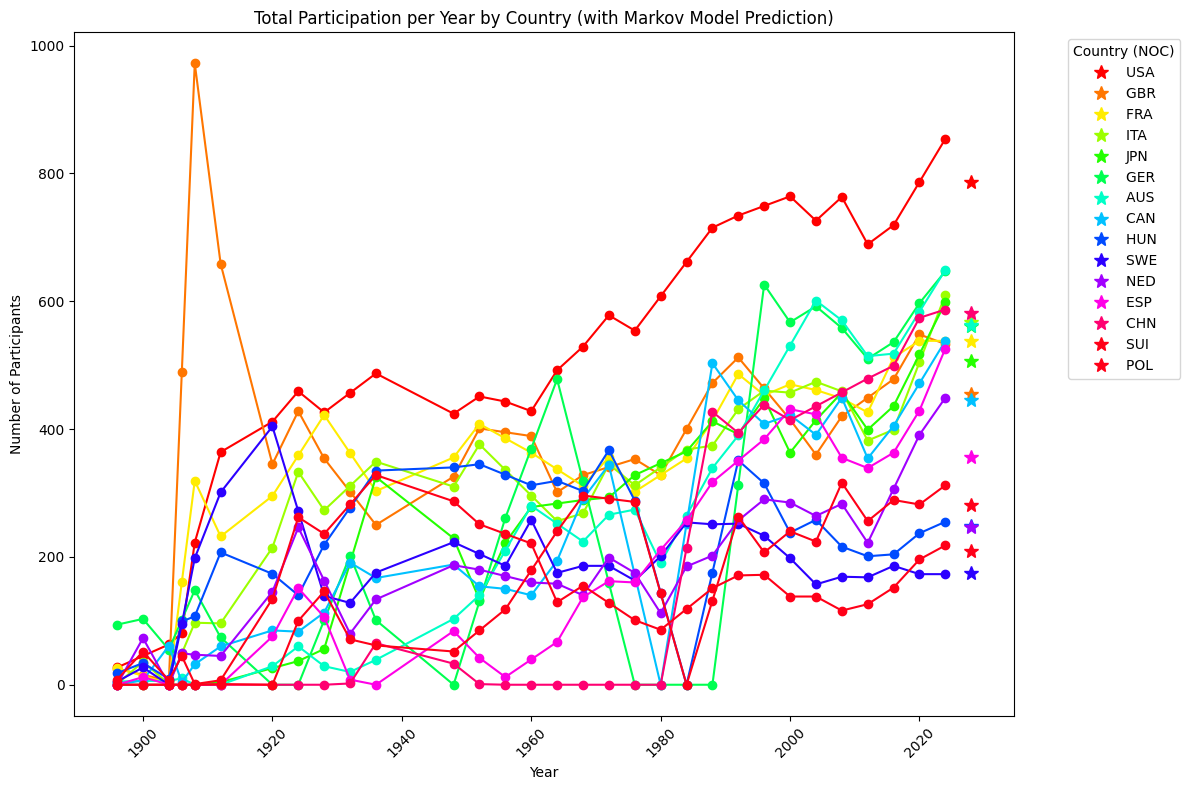

In [228]:
import numpy as np
import matplotlib.pyplot as plt

# 步骤一：定义状态空间，使用最近数据进行状态划分
num_states = 5  # 将参与人数划分为5个状态
decay_factor = 0.9  # 时间加权因子
smooth_constant = 1e-4  # 平滑常数

# 选择前10个国家，可以根据某种标准排序
top_countries = participation_by_year_country_q1_clean.sum().sort_values(ascending=False).head(15).index

# 创建一个空的图形，用来绘制所有国家的结果
plt.figure(figsize=(12, 8))

# 遍历前10个国家，进行预测
for index, country in enumerate(top_countries):
    country_table = participation_by_year_country_q1_clean[country]

    # 获取每个国家的年份和参与人数
    years = participation_by_year_country_q1_clean.index.values
    participants = country_table.values

    # 使用最近的数据来计算状态划分
    recent_years_participants = participants[-5:]  # 只考虑最近5年的数据
    state_bins = np.percentile(recent_years_participants, np.linspace(0, 100, num_states + 1))  # 根据百分位数划分
    states = np.digitize(participants, state_bins) - 1  # 将参与人数映射为状态索引

    # 修正：确保状态值在0到num_states-1之间
    states = np.clip(states, 0, num_states - 1)

    # 引入时间加权，给较近年份更高权重
    weights = np.array([decay_factor ** (len(years) - i) for i in range(len(years))])

    # 计算加权状态转移矩阵
    transition_matrix = np.zeros((num_states, num_states))

    for i in range(len(states) - 1):
        current_state = states[i]
        next_state = states[i + 1]
        
        # 加权转移次数
        weight = weights[i]
        transition_matrix[current_state, next_state] += weight

    # 将转移次数转化为概率
    row_sums = transition_matrix.sum(axis=1, keepdims=True)
    row_sums[row_sums == 0] = 1  # 将零行的总和设置为1，以避免除零错误

    # 对转移矩阵进行平滑处理，防止出现零概率
    transition_matrix += smooth_constant
    transition_matrix = transition_matrix / transition_matrix.sum(axis=1, keepdims=True)  # 重新归一化

    # 步骤三：预测未来状态
    current_state = states[-1]  # 假设当前状态是最后一年的状态

    # 预测下一个状态
    future_state_probs = transition_matrix[current_state]

    # 如果概率包含 NaN 或零概率，进行处理
    future_state_probs = np.nan_to_num(future_state_probs, nan=1.0)  # 将 NaN 替换为 1，确保概率有效

    # 确保概率和为1
    future_state_probs /= np.sum(future_state_probs)

    # 使用概率选择下一个状态
    predicted_future_state = np.random.choice(range(num_states), p=future_state_probs)

    # 将预测的状态映射回参与人数区间
    predicted_participation = (state_bins[predicted_future_state] + state_bins[predicted_future_state + 1]) / 2

    # 绘制原始数据
    line_color = plt.cm.hsv(index*20)  # 使用不同的颜色图
    plt.plot(years, participants, marker='o', linestyle='-', markersize=6, color=line_color)

    # 显示预测的参与人数，稍微向后移动预测的 x 轴位置
    plt.plot(years[-1] + 4, predicted_participation, '*', label=f'{country} ', markersize=10, color=line_color)

# 添加标题和标签
plt.title('Total Participation per Year by Country (with Markov Model Prediction)')
plt.xlabel('Year')
plt.ylabel('Number of Participants')
plt.xticks(rotation=45)
plt.legend(title='Country (NOC)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


多图输出

In [205]:
# # 步骤一：定义状态空间，使用最近数据进行状态划分
# num_states = 5  # 将参与人数划分为5个状态
# decay_factor = 0.9  # 时间加权因子
# smooth_constant = 1e-4  # 平滑常数
# 
# # 遍历每个国家，进行预测
# for country in participation_by_year_country_q1_clean.columns:
#     country_table = participation_by_year_country_q1_clean[country]
# 
#     # 获取每个国家的年份和参与人数
#     years = participation_by_year_country_q1_clean.index.values
#     participants = country_table.values
# 
#     # 使用最近的数据来计算状态划分
#     recent_years_participants = participants[-5:]  # 只考虑最近5年的数据
#     state_bins = np.percentile(recent_years_participants, np.linspace(0, 100, num_states + 1))  # 根据百分位数划分
#     states = np.digitize(participants, state_bins) - 1  # 将参与人数映射为状态索引
# 
#     # 修正：确保状态值在0到num_states-1之间
#     states = np.clip(states, 0, num_states - 1)
# 
#     # 引入时间加权，给较近年份更高权重
#     weights = np.array([decay_factor ** (len(years) - i) for i in range(len(years))])
# 
#     # 计算加权状态转移矩阵
#     transition_matrix = np.zeros((num_states, num_states))
# 
#     for i in range(len(states) - 1):
#         current_state = states[i]
#         next_state = states[i + 1]
#         
#         # 加权转移次数
#         weight = weights[i]
#         transition_matrix[current_state, next_state] += weight
# 
#     # 将转移次数转化为概率
#     row_sums = transition_matrix.sum(axis=1, keepdims=True)
#     row_sums[row_sums == 0] = 1  # 将零行的总和设置为1，以避免除零错误
# 
#     # 对转移矩阵进行平滑处理，防止出现零概率
#     transition_matrix += smooth_constant
#     transition_matrix = transition_matrix / transition_matrix.sum(axis=1, keepdims=True)  # 重新归一化
# 
#     # 步骤三：预测未来状态
#     current_state = states[-1]  # 假设当前状态是最后一年的状态
# 
#     # 预测下一个状态
#     future_state_probs = transition_matrix[current_state]
# 
#     # 如果概率包含 NaN 或零概率，进行处理
#     future_state_probs = np.nan_to_num(future_state_probs, nan=1.0)  # 将 NaN 替换为 1，确保概率有效
# 
#     # 确保概率和为1
#     future_state_probs /= np.sum(future_state_probs)
# 
#     # 使用概率选择下一个状态
#     predicted_future_state = np.random.choice(range(num_states), p=future_state_probs)
# 
#     # 将预测的状态映射回参与人数区间
#     predicted_participation = (state_bins[predicted_future_state] + state_bins[predicted_future_state + 1]) / 2
# 
#     # 打印预测的参与人数
#     print(f"Predicted participation for next year ({country}): {predicted_participation}")
# 
#     # 可视化数据
#     plt.figure(figsize=(10, 6))
# 
#     # 绘制原始数据
#     country_table.plot(kind='line', marker='o', figsize=(10, 6))
# 
#     # 显示预测的参与人数
#     plt.plot(years[-1] + 4, predicted_participation, 'go', label=f'Predicted Participation ({country})', markersize=10)
# 
#     # 添加标题和标签
#     plt.title(f'Total Participation per Year by Country ({country}) (with Markov Model Prediction)')
#     plt.xlabel('Year')
#     plt.ylabel('Number of Participants')
#     plt.xticks(rotation=45)
#     plt.legend(title='Country (NOC)', bbox_to_anchor=(1.05, 1), loc='upper left')
#     plt.tight_layout()
#     plt.show()
